In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os 
cwd = os.getcwd() + '/Self-Driving/'
# Read in the image
image = mpimg.imread(cwd+'edge1.jpg')

In [18]:
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)
red_threshold = 200
green_threshold = 200
blue_threshold = 200

rgb_threshold = [red_threshold, green_threshold, blue_threshold]
line_image = np.copy(image)
left_bottom = [0, ysize]
right_bottom = [xsize, ysize]
apex = [xsize / 2, 320]

# Perform a linear fit (y=Ax+B) to each of the three sides of the triangle
# np.polyfit returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Mask pixels below the threshold
color_thresholds = (image[:, :, 0] < rgb_threshold[0]) | \
                   (image[:, :, 1] < rgb_threshold[1]) | \
                   (image[:, :, 2] < rgb_threshold[2])
color_thresholds.shape

(540, 960)

In [20]:
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))

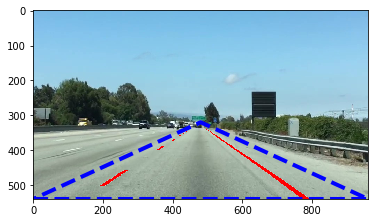

In [23]:
region_thresholds = (YY > (XX * fit_left[0] + fit_left[1])) & \
                    (YY > (XX * fit_right[0] + fit_right[1])) & \
                    (YY < (XX * fit_bottom[0] + fit_bottom[1]))
color_select[color_thresholds | ~region_thresholds] = [0, 0, 0]
line_image[~color_thresholds & region_thresholds] = [255, 0, 0]

# Display the image and show region and color selections
# plt.imshow(image)
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
plt.plot(x, y, 'b--', lw=4)
plt.imshow(color_select)
plt.imshow(line_image)
plt.show()